In [22]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [24]:
conda install scikit-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0




In [25]:
conda install wordcloud

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0




In [26]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install newspaper3k


Note: you may need to restart the kernel to use updated packages.


### 

KNN Model:
Accuracy: 0.9461883408071748
Precision: 0.9482538058444867

Logistic Regression Model:
Accuracy: 0.9775784753363229
Precision: 0.9781963093162935

SVM Model:
Accuracy: 0.9798206278026906
Precision: 0.9804473988126658

Decision Tree Model:
Accuracy: 0.8161434977578476
Precision: 0.8169218254572139

Cluster Model:
Accuracy: 0.16352201257861634
Precision: 0.4196108976742603

Best Model based on Accuracy: Logistic Regression


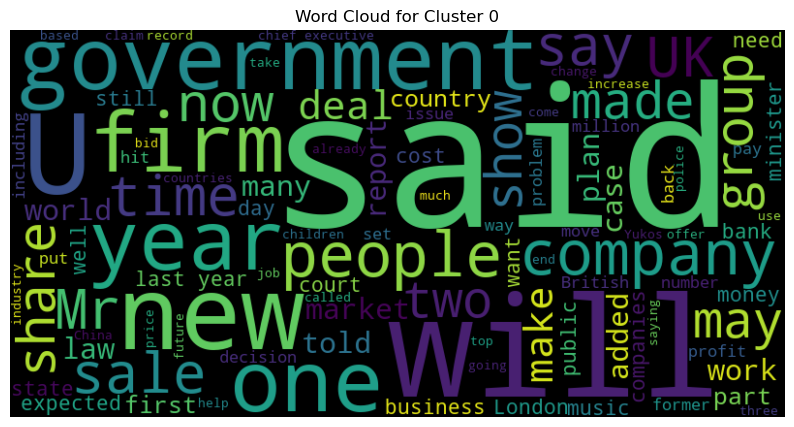

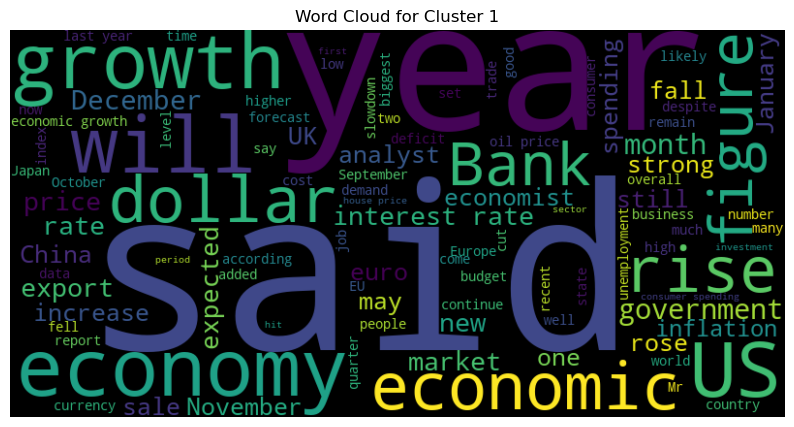

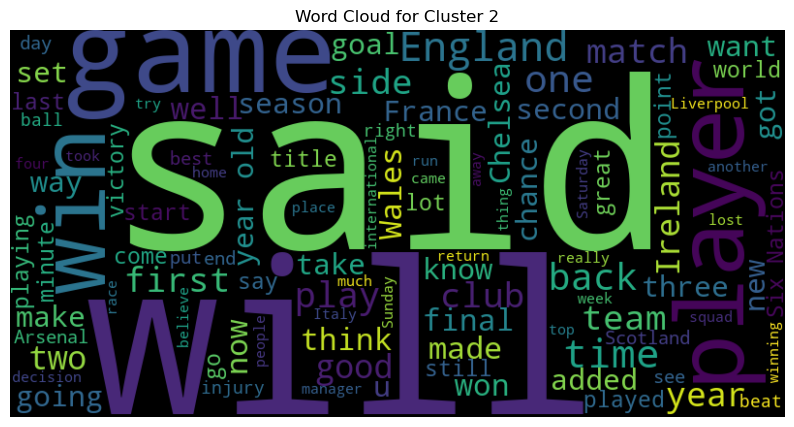

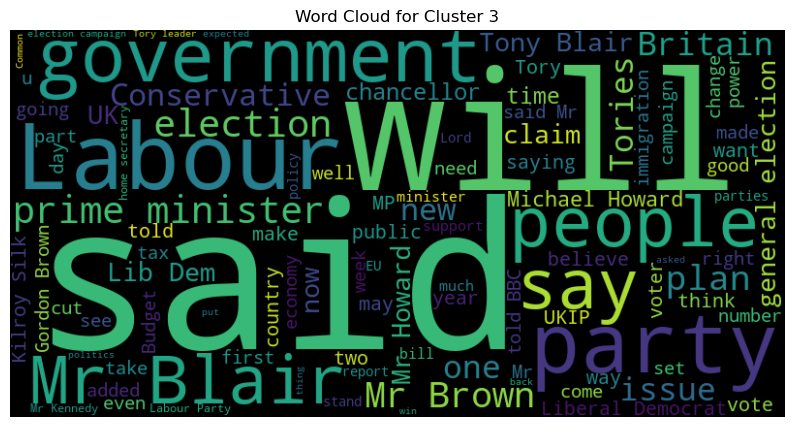

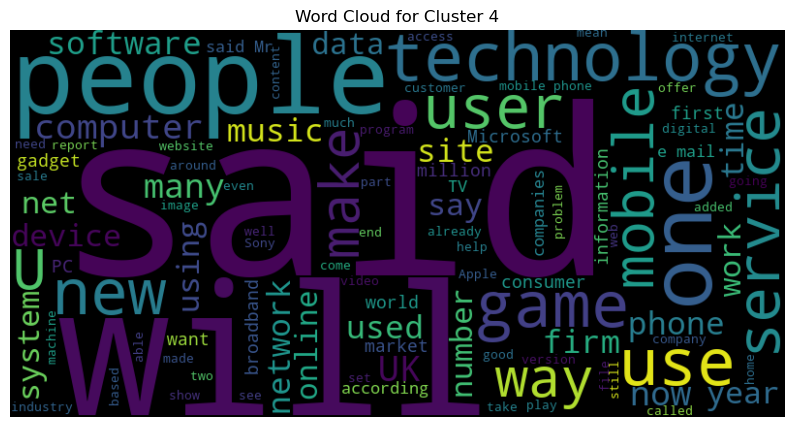

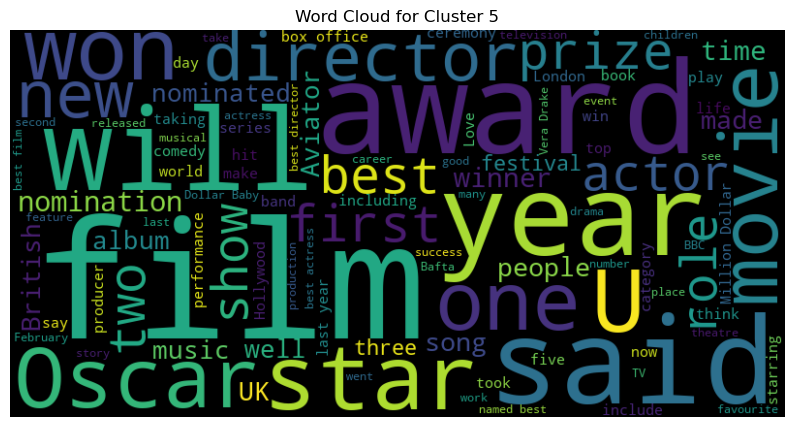

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('bbc-news-data.csv', sep='\t', header=None, names=['Category', 'Filename', 'Title', 'Content'])

# Assign numerical labels for categories
category_dict = {category: idx for idx, category in enumerate(data['Category'].unique())}
data['Category_ID'] = data['Category'].map(category_dict)

# Splitting data into features and target
X = data['Content']
y = data['Category_ID']

# Vectorizing text data
vectorizer = TfidfVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Building and training KNN Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Building and training Logistic Regression Classifier
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Building and training Support Vector Machine Classifier
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Building and training Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluating the models
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')

print("KNN Model:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")

print("\nLogistic Regression Model:")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")

print("\nSVM Model:")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")

print("\nDecision Tree Model:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")

# Clustering based on categories (Example using KMeans)
kmeans = KMeans(n_clusters=len(data['Category'].unique()), n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_vectorized)

# Calculate accuracy and precision for clustering
accuracy_cluster = accuracy_score(data['Category_ID'], data['Cluster'])
precision_cluster = precision_score(data['Category_ID'], data['Cluster'], average='weighted')

print("\nCluster Model:")
print(f"Accuracy: {accuracy_cluster}")
print(f"Precision: {precision_cluster}")

# Determine the best model based on accuracy and precision
best_model = "KNN" if accuracy_knn > accuracy_lr and accuracy_knn > accuracy_svm and accuracy_knn > accuracy_dt else "Logistic Regression"
print(f"\nBest Model based on Accuracy: {best_model}")

# Word Cloud for KMeans clusters
for cluster in range(len(data['Category'].unique())):
    cluster_text = ' '.join(data[data['Cluster'] == cluster]['Content'])
    wordcloud = WordCloud(width=800, height=400, max_words=100).generate(cluster_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.axis('off')
    plt.show()


Best Model: SVM
Evaluation Results:
KNN: Accuracy=0.950561797752809, Precision=0.9513277575962377
Logistic Regression: Accuracy=0.9752808988764045, Precision=0.9758469277820607
SVM: Accuracy=0.9775280898876404, Precision=0.9779034276220285
Decision Tree: Accuracy=0.8067415730337079, Precision=0.8071655718252684


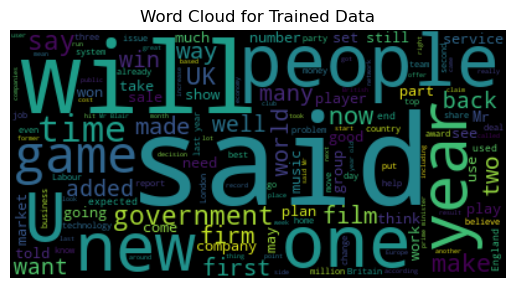

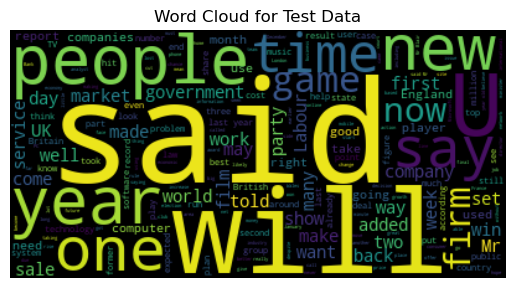

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pickle
# Load the dataset
data = pd.read_csv('bbc-news-data.csv', sep='\t', header=None, names=['Category', 'Filename', 'Title', 'Content'])

# Split data into train, test, and validation sets
train_data, test_val_data = train_test_split(data, test_size=0.4, random_state=42)
test_data, val_data = train_test_split(test_val_data, test_size=0.5, random_state=42)

# Vectorize text data
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train_data['Content'])
y_train = train_data['Category']

X_test = vectorizer.transform(test_data['Content'])
y_test = test_data['Category']

X_val = vectorizer.transform(val_data['Content'])
y_val = val_data['Category']

# Train different classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Decision Tree': DecisionTreeClassifier()
}

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': accuracy, 'Precision': precision}

# Get the best model
best_model = max(results, key=lambda x: results[x]['Accuracy'])
print(f"Best Model: {best_model}")
print("Evaluation Results:")
for model, metrics in results.items():
    print(f"{model}: Accuracy={metrics['Accuracy']}, Precision={metrics['Precision']}")

# Generate word cloud for trained and test data
wordcloud_train = WordCloud().generate(' '.join(train_data['Content']))
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Trained Data")
plt.show()

wordcloud_test = WordCloud().generate(' '.join(test_data['Content']))
plt.imshow(wordcloud_test, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Test Data")
plt.show()

user_satisfied = False
while not user_satisfied:
    user_input = input("Enter a piece of text: ")
    predicted_category = classifiers[best_model].predict(vectorizer.transform([user_input]))[0]
    print(f"Predicted category: {predicted_category}")
    is_correct = input("Is this prediction correct? (yes/no): ").lower().strip()
    if is_correct == 'no':
        correct_category = input("Enter the correct category: ")
        # Add user input and its correct category to training data
        new_row = {'Content': user_input, 'Category': correct_category}
        train_data = pd.concat([train_data, pd.DataFrame([new_row])], ignore_index=True)
        # Update X_train, y_train
        X_train = vectorizer.fit_transform(train_data['Content'])
        y_train = train_data['Category']
        for name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')
            results[name] = {'Accuracy': accuracy, 'Precision': precision}
        # Get the best model after retraining
        best_model = max(results, key=lambda x: results[x]['Accuracy'])
        print(f"Best Model: {best_model}")
        # Show updated evaluation results
        print("Updated Evaluation Results:")
        for model, metrics in results.items():
            print(f"{model}: Accuracy={metrics['Accuracy']}, Precision={metrics['Precision']}")
    else:
        user_satisfied = True




# Assuming the best model is 'classifiers[best_model]'
best_trained_model = classifiers[best_model]

# Save the best model to a pickle file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_trained_model, file)